# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
"""
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
"""

'\nstate = env_info.vector_observations[0]            # get the current state\nscore = 0                                          # initialize the score\nwhile True:\n    action = np.random.randint(action_size)        # select an action\n    env_info = env.step(action)[brain_name]        # send the action to the environment\n    next_state = env_info.vector_observations[0]   # get the next state\n    reward = env_info.rewards[0]                   # get the reward\n    done = env_info.local_done[0]                  # see if episode has finished\n    score += reward                                # update the score\n    state = next_state                             # roll over the state to next time step\n    if done:                                       # exit loop if episode finished\n        break\n    \nprint("Score: {}".format(score))\n'

In [6]:
env_info = env.step(1)[brain_name]

When finished, you can close the environment.

In [7]:
env_info.vector_observations[0] # next state

array([ 0.        ,  1.        ,  0.        ,  0.        ,  0.17788731,
        0.        ,  1.        ,  0.        ,  0.        ,  0.21135208,
        1.        ,  0.        ,  0.        ,  0.        ,  0.3379637 ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.15728076,
        1.        ,  0.        ,  0.        ,  0.        ,  0.58536041,
        0.        ,  1.        ,  0.        ,  0.        ,  0.16940029,
        0.        ,  1.        ,  0.        ,  0.        ,  0.33455756,
        0.        , -7.81049395])

In [8]:
env_info.rewards[0] # reward

0.0

In [9]:
env_info.local_done[0] # done

False

In [10]:
# env_info.vector_observations[0] # next state
# env_info.rewards[0] # reward
# env_info.local_done[0] # done

In [11]:
GLOBAL_BRAIN_NAME = brain_name

In [12]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

# Navigation Agent Implementation

## Imports

In [13]:
from numpy import mean
from typing import List
import matplotlib.pyplot as plt
from datetime import datetime
from collections import deque

## Helper Functions and Classes

In [14]:
def plot(x_data: List[int], y_data: List[float], plot_title: str, y_label: str) -> None:
    """
    Creats simple plot.
    """
    plt.figure(figsize=(15, 6), dpi=80)
    plt.title(plot_title)
    plt.xlabel("Episode Number")
    plt.ylabel(y_label)
    plt.plot(x_data, y_data, "g", linewidth=2)
    plt.show()

In [15]:
def add_zeros_in_front_and_convert_to_string(number: int, order: int) -> str:
    """
    Adds zeros in front of the number, and return without the first digit.
    Usage: number=5, order=100 -> "05"
    :param number: int.
    :param order: int.
    :return: str.
    """
    return str(number + order)[1:]

def convert_datetime_to_string_date(now: datetime = datetime.now()) -> str:
    """
    Converts now to string format yyyy-dd-yy-hh-mm-ss
    :param now: datetime. Date in datetime format. Default value is datetime.now().
    :return: str.
    """
    year = now.year
    month = add_zeros_in_front_and_convert_to_string(now.month, 100)
    day = add_zeros_in_front_and_convert_to_string(now.day, 100)
    hour = add_zeros_in_front_and_convert_to_string(now.hour, 100)
    minute = add_zeros_in_front_and_convert_to_string(now.minute, 100)
    second = add_zeros_in_front_and_convert_to_string(now.second, 100)
    now_str = f"{year}-{month}-{day}-{hour}-{minute}-{second}"
    return now_str

In [16]:
from datetime import datetime
from time import sleep, time
from typing import Union, List, Tuple

from pandas import DataFrame

DEC_PLACES = 2

class Timer:
    """
    Class for measuring execution time.

    It has initial and final timestamps and as many in the middle as necessary. It can voluntary print out some message.
    """    
    
    def __init__(self) -> None:
        self._timer_start_time: float
        self._timer_end_time: float
        self._task_start_time: float

        self._mean_times_in_sec: List[float]
        self._mean_time_cumulative_secs: List[float]
        self._mean_times_labels: List[str]

        self._print_results: bool = True

    def set_results_printing(self, print_results: bool) -> None:
        """
        Sets if to print the results.
        :param print_results: bool.
        """
        self._print_results = print_results

    def start(self) -> None:
        """
        Starts global time measurement.
        """
        self._timer_start_time = time()
        self._timer_end_time = self._timer_start_time
        self._task_start_time = self._timer_start_time

        self._mean_times_in_sec = []
        self._mean_time_cumulative_secs = []
        self._mean_times_labels = []

        if self._print_results:
            print(f"Date and Time of Starting Execution: {self._as_date(self._timer_start_time).strftime('%d/%m/%Y')} "
                  f"{self._as_date(self._timer_start_time).strftime('%X')}")    
    def get_meantime(self, label: Union[str, None] = None) -> Tuple[float, float]:
        """
        Adds meantime.
        :param label: str. Label of last interval.
        :return: Tuple[float, float]. Difference from the last meantime in seconds and minutes.
        """
        now = time()
        diff = now - self._task_start_time
        self._mean_times_in_sec.append(diff)
        self._mean_time_cumulative_secs.append(sum(self._mean_times_in_sec))
        self._mean_times_labels.append(label or "")
        self._task_start_time = now
        self._timer_end_time = now

        return round(diff, DEC_PLACES), round(diff / 60, DEC_PLACES)

    def set_meantime(self, label: Union[str, None] = None) -> None:
        """
        Sets end of the mean time interval as time and (voluntary) label. Optionally prints results to the console.
        :param label: str. Label of interval that ended.
        """
        diff_s, diff_m = self.get_meantime(label)

        if self._print_results:
            print(f"Duration of: {label} is {diff_s} s, {diff_m} mins.")
    def get_end(self, label: Union[str, None]) -> Tuple[float, float, float, float]:
        """
        Ends global time measurement.
        :param label: str. Label of last interval.
        :return: Tuple[float, float, float, float]. Difference from the last meantime in seconds and minutes and
                                      overall duration, both in seconds and minutes.
        """
        self._timer_end_time = time()
        diff = self._timer_end_time - self._task_start_time
        duration = self._timer_end_time - self._timer_start_time
        self._mean_times_in_sec.append(diff)
        self._mean_time_cumulative_secs.append(sum(self._mean_times_in_sec))
        self._mean_times_labels.append(label or "")

        return round(diff, DEC_PLACES), round(diff / 60, DEC_PLACES), round(duration, DEC_PLACES), \
               round(duration / 60, DEC_PLACES)

    def end(self, label: Union[str, None] = None) -> None:
        """
        Ends and saves the end time. Optionally prints results to the console.
        :param label: str. Label of last interval.
        """
        diff_s, diff_m, duration_s, duration_m = self.get_end(label)

        if self._print_results:
            print(f"Duration of: {label} is {diff_s} s, {diff_m} mins.")
            print(f"Date and Time of Ending Execution: {self._as_date(self._timer_end_time).strftime('%d/%m/%Y')} "
                  f"{self._as_date(self._timer_end_time).strftime('%X')}")
            print(f"Overall Duration is: {duration_s} s, {duration_m} mins.")   
    # GETTERS -------------------------------------------------------------------------------------

    def get_start_time(self) -> float:
        """
        Returns global start time as timestamp/float.
        :return: float.
        """
        return self._timer_start_time

    def get_end_time(self) -> float:
        """
        Returns global end time as timestamp/float.
        :return: float.
        """
        return self._timer_end_time

    def get_data(self) -> Tuple[List[float], List[float], List[str], DataFrame]:
        """
        Returns interval durations, cumulative time, and label times both separately and in the form of a dataframe.
        :return: Tuple[List[float], List[float], List[str], DataFrame]. Mean duration times in seconds, cumulative mean
        times and mean label times.
        """
        df = DataFrame()
        df["LABEL"] = self._mean_times_labels
        df["MEANTIMES [s]"] = self._mean_times_in_sec
        df["CUMULATIVE TIME [s]"] = self._mean_time_cumulative_secs
        return self._mean_times_in_sec, self._mean_time_cumulative_secs, self._mean_times_labels, df

    # HELPER FUNCTIONS ----------------------------------------------------------------------------   
    
    
    @staticmethod
    def _as_date(timestamp: float) -> datetime:
        """
        Converts timestamp in float format to date format.
        :param timestamp: float. Date as float.
        :return: datetime.
        """
        return datetime.utcfromtimestamp(timestamp)


## Segment Trees

In [17]:
"""
This code was taken from https://github.com/openai/baselines/blob/master/baselines/common/segment_tree.py
"""

import operator


class SegmentTree(object):
    def __init__(self, capacity, operation, neutral_element):
        """Build a Segment Tree data structure.
        https://en.wikipedia.org/wiki/Segment_tree
        Can be used as regular array, but with two
        important differences:
            a) setting item's value is slightly slower.
               It is O(lg capacity) instead of O(1).
            b) user has access to an efficient ( O(log segment size) )
               `reduce` operation which reduces `operation` over
               a contiguous subsequence of items in the array.
        Paramters
        ---------
        capacity: int
            Total size of the array - must be a power of two.
        operation: lambda obj, obj -> obj
            and operation for combining elements (eg. sum, max)
            must form a mathematical group together with the set of
            possible values for array elements (i.e. be associative)
        neutral_element: obj
            neutral element for the operation above. eg. float('-inf')
            for max and 0 for sum.
        """
        assert capacity > 0 and capacity & (capacity - 1) == 0, "capacity must be positive and a power of 2."
        self._capacity = capacity
        self._value = [neutral_element for _ in range(2 * capacity)]
        self._operation = operation

    def _reduce_helper(self, start, end, node, node_start, node_end):
        if start == node_start and end == node_end:
            return self._value[node]
        mid = (node_start + node_end) // 2
        if end <= mid:
            return self._reduce_helper(start, end, 2 * node, node_start, mid)
        else:
            if mid + 1 <= start:
                return self._reduce_helper(start, end, 2 * node + 1, mid + 1, node_end)
            else:
                return self._operation(
                    self._reduce_helper(start, mid, 2 * node, node_start, mid),
                    self._reduce_helper(mid + 1, end, 2 * node + 1, mid + 1, node_end)
                )

    def reduce(self, start=0, end=None):
        """Returns result of applying `self.operation`
        to a contiguous subsequence of the array.
            self.operation(arr[start], operation(arr[start+1], operation(... arr[end])))
        Parameters
        ----------
        start: int
            beginning of the subsequence
        end: int
            end of the subsequences
        Returns
        -------
        reduced: obj
            result of reducing self.operation over the specified range of array elements.
        """
        if end is None:
            end = self._capacity
        if end < 0:
            end += self._capacity
        end -= 1
        return self._reduce_helper(start, end, 1, 0, self._capacity - 1)

    def __setitem__(self, idx, val):
        # index of the leaf
        idx += self._capacity
        self._value[idx] = val
        idx //= 2
        while idx >= 1:
            self._value[idx] = self._operation(
                self._value[2 * idx],
                self._value[2 * idx + 1]
            )
            idx //= 2

    def __getitem__(self, idx):
        assert 0 <= idx < self._capacity
        return self._value[self._capacity + idx]


class SumSegmentTree(SegmentTree):
    def __init__(self, capacity):
        super(SumSegmentTree, self).__init__(
            capacity=capacity,
            operation=operator.add,
            neutral_element=0.0
        )

    def sum(self, start=0, end=None):
        """Returns arr[start] + ... + arr[end]"""
        return super(SumSegmentTree, self).reduce(start, end)

    def find_prefixsum_idx(self, prefixsum):
        """Find the highest index `i` in the array such that
            sum(arr[0] + arr[1] + ... + arr[i - i]) <= prefixsum
        if array values are probabilities, this function
        allows to sample indexes according to the discrete
        probability efficiently.
        Parameters
        ----------
        perfixsum: float
            upperbound on the sum of array prefix
        Returns
        -------
        idx: int
            highest index satisfying the prefixsum constraint
        """
        assert 0 <= prefixsum <= self.sum() + 1e-5
        idx = 1
        while idx < self._capacity:  # while non-leaf
            if self._value[2 * idx] > prefixsum:
                idx = 2 * idx
            else:
                prefixsum -= self._value[2 * idx]
                idx = 2 * idx + 1
        return idx - self._capacity


class MinSegmentTree(SegmentTree):
    def __init__(self, capacity):
        super(MinSegmentTree, self).__init__(
            capacity=capacity,
            operation=min,
            neutral_element=float('inf')
        )

    def min(self, start=0, end=None):
        """Returns min(arr[start], ...,  arr[end])"""

        return super(MinSegmentTree, self).reduce(start, end)

## Replay Buffer

> **NOTE:** The typing was deleted due to the error. Please see the report file for more information and the original file in the repository.

In [18]:
"""
Replay buffer.
"""
from typing import Any, Tuple, List, Optional

from numpy import zeros, ndarray, dtype, array
from numpy.random import choice, uniform
from sklearn.preprocessing import OneHotEncoder

class ReplayBuffer():
    """
    Numpy-based replay buffer.
    """

    def __init__(self, state_dim: int, actions_dim: Any, buffer_size: int, batch_size: int, n_actions: int) -> None:
        """
        :param state_dim: int. Dimension of state space.
        :param actions_dim: int. Dimension of actions dim (not the amount of actions!!).
        :param buffer_size: int. Size of the buffer's memory.
        :param batch_size: int. Size of the batch generated.
        :param n_actions: int. Number of distinct actions. Used for one hot encoding equivalence for actions if
                               actions_dim equals 1.
        """
        self._states_buffer = zeros((buffer_size, state_dim))
        self._actions_buffer = zeros((buffer_size, actions_dim))
        self._rewards_buffer = zeros((buffer_size, 1))
        self._next_states_buffer = zeros((buffer_size, state_dim))
        self._done_buffer = zeros((buffer_size, 1))

        self._buffer_size = buffer_size
        self._batch_size = batch_size

        self._pointer: int = 0
        self._current_size: int = 0

        self._ooh = OneHotEncoder(sparse=False)
        self._do_ooh = False
        if actions_dim == 1 and n_actions > 0:
            self._do_ooh = True
            training_data: ndarray[Any, dtype[Any]] = array(list(range(n_actions))).reshape((n_actions, 1))
            self._ooh.fit(training_data)

    def add(self, state , action, reward, next_state, done) -> None:
        """
        Adds the experience set.
        :param state: ndarray[Any, dtype[Any]].
        :param action: ndarray[Any, dtype[Any]].
        :param reward: float.
        :param next_state: ndarray[Any, dtype[Any]].
        :param done: bool.
        :return:
        """
        self._states_buffer[self._pointer, :] = state
        self._actions_buffer[self._pointer, :] = action
        self._rewards_buffer[self._pointer, :] = reward
        self._next_states_buffer[self._pointer, :] = next_state
        self._done_buffer[self._pointer, :] = done

        self._pointer = (self._pointer + 1) % self._buffer_size
        self._current_size = min(self._current_size + 1, self._buffer_size)

    def sample(self) -> Any:
        """
        :return: Tuple[ndarray[Any, dtype[Any]], ndarray[Any, dtype[Any]], ndarray[Any, dtype[Any]], \
                              ndarray[Any, dtype[Any]], ndarray[Any, dtype[Any]], Optional[ndarray[Any, dtype[Any]]]]:
                 (states, actions, rewards, next_states, dons, actions_oh).
        """
        indices = choice(self._current_size, size=self._batch_size, replace=False)
        actions = self._actions_buffer[indices, :]
        actions_ooh = None
        if self._do_ooh:
            actions_ooh = self._ooh.transform(actions)
        return (
            self._states_buffer[indices, :],
            actions,
            self._rewards_buffer[indices, :],
            self._next_states_buffer[indices, :],
            self._done_buffer[indices, :],
            actions_ooh
        )

    def get_current_size(self) -> int:
        """
        Gets the current size.
        """
        return self._current_size


class PrioritizedReplayBuffer(ReplayBuffer):
    """
    Numpy-based prioritized experience buffer.

    Segment trees are used here. Please see the file with code for more information.

    Concept was taken from here: https://github.com/Curt-Park/rainbow-is-all-you-need.
    """

    def __init__(self, state_dim: int, actions_dim: Any, buffer_size: int, batch_size: int, n_actions: int, \
                 alpha: float) -> None:
        """
        :param state_dim: int. Dimension of state space.
        :param actions_dim: int. Dimension of actions dim (not the amount of actions!!).
        :param buffer_size: int. Size of the buffer's memory.
        :param batch_size: int. Size of the batch generated.
        :param n_actions: int. Number of distinct actions. Used for one hot encoding equivalence for actions if
                               actions_dim equals 1.
        :param alpha: float. Prioritisation alpha parameter.
        """
        ReplayBuffer.__init__(self, state_dim, actions_dim, buffer_size, batch_size, n_actions)

        self._alpha = alpha
        self._tree_pointer = 0
        self._max_priority = 1.0

        # computing tree capacity (has to be power of 2)
        self._tree_capacity = 1
        while self._tree_capacity < self._buffer_size:
            self._tree_capacity = self._tree_capacity * 2

        self._sum_tree = SumSegmentTree(capacity=self._tree_capacity)
        self._min_tree = MinSegmentTree(capacity=self._tree_capacity)
    
    def add(self, state , action, reward, next_state, done) -> None:
        """
        Adds the experience set.
        :param state: ndarray[Any, dtype[Any]].
        :param action: ndarray[Any, dtype[Any]].
        :param reward: float.
        :param next_state: ndarray[Any, dtype[Any]].
        :param done: bool.
        """
        super().add(state, action, reward, next_state, done)

        self._sum_tree[self._tree_pointer] = self._max_priority ** self._alpha
        self._min_tree[self._tree_pointer] = self._max_priority ** self._alpha
        self._tree_pointer = (self._tree_pointer + 1) % self._buffer_size

    def _sample_indices(self) -> List[int]:
        """
        Sample the indices proportionally to the distribution of the priorities.
        :return: List[int]. List of indices.
        """
        indices = []
        distribution_mass = self._sum_tree.sum(0, self._tree_capacity - 1) # this caused an error
        # distribution_mass = self._sum_tree.sum(0, self._buffer_size - 1)
        segment_mass = distribution_mass / self._batch_size

        for i in range(self._batch_size):
            lower_segment_bound = segment_mass * i
            upper_segment_bound = segment_mass * (i + 1)
            upper_bound = uniform(lower_segment_bound, upper_segment_bound)
            index = self._sum_tree.find_prefixsum_idx(upper_bound)
            # indices.append(index) # just adding the index caused an error in a corner case
            if index < self._buffer_size:
                indices.append(index)
            else:
                indices.append(self._current_size)

        return indices

    def _calculate_weight(self, index: int, beta: float) -> float:
        """
        Calculates the weights.
        :param index: int. Index of the experience for which it has to be calculated.
        :param beta: float. Beta parameter for calculation.
        :return: float. Weight.
        """
        min_probability = self._min_tree.min() / self._sum_tree.sum()
        max_weight = (min_probability * self._tree_capacity) ** (-beta)

        experience_probability = self._sum_tree[index] / self._sum_tree.sum()
        weight = (experience_probability * self._tree_capacity) ** (-beta)

        return float(weight / max_weight)

    # pylint: disable=arguments-differ
    def sample(self, beta: float) -> Any:
        """
        Sample the batch from the buffer.
        :param beta: float. Beta parameter for calculation.
        :return: Tuple[ndarray[Any, dtype[Any]], ndarray[Any, dtype[Any]], ndarray[Any, dtype[Any]], \
                              ndarray[Any, dtype[Any]], ndarray[Any, dtype[Any]], Optional[ndarray[Any, dtype[Any]]]
                              List[int]]:
                 (states, actions, rewards, next_states, dons, actions_oh, weights, indices).
        """
        indices = self._sample_indices()
        actions = self._actions_buffer[indices, :]
        actions_ooh = None
        if self._do_ooh:
            actions_ooh = self._ooh.transform(actions)
        weights: ndarray[Any, dtype[Any]] = array([self._calculate_weight(index, beta) for index in indices]).reshape(
            (self._batch_size, 1))
        return (
            self._states_buffer[indices, :],
            actions,
            self._rewards_buffer[indices, :],
            self._next_states_buffer[indices, :],
            self._done_buffer[indices, :],
            actions_ooh,
            weights,
            indices
        )

    def update_priorities(self, indices, priorities) -> None:
        """
        Updates the priorities in the tree.
        :param indices: List[int]. List of indices to be updated.
        :param priorities: ndarray[Any, dtype[Any]]. (k, 1) array.
        """
        for index, priority in zip(indices, priorities):
            self._sum_tree[index] = priority ** self._alpha
            self._min_tree[index] = priority ** self._alpha

            self._max_priority = max(self._max_priority, priority)


## Network

> **NOTE:** The typing was deleted due to the error. Please see the report file for more information and the original file in the repository.

In [19]:
from typing import Any

import torch
from numpy import ndarray, dtype
from torch import nn

LAYER_DIM = 64
P_DROPOUT = 0.5

class DuelingQNetwork(nn.Module):
    """
    Dueling network.
    """

    def __init__(self, state_dim: int, actions_dim: int, seed: int):
        """
        Initialisation.
        :param state_dim: int. Dimension of state space.
        :param actions_dim: int. Dimension of actions space.
        :param seed: int. Seed.
        """
        super().__init__()  # type:ignore

        self.seed = torch.manual_seed(seed)

        self.feature_layer = nn.Sequential(
            nn.Linear(state_dim, LAYER_DIM),
            nn.ReLU(),
            nn.Linear(LAYER_DIM, LAYER_DIM),
            nn.ReLU(),
        )

        self.advantage_layer = nn.Sequential(
            nn.Linear(LAYER_DIM, LAYER_DIM),
            nn.ReLU(),
            nn.Linear(LAYER_DIM, actions_dim),
        )

        self.value_layer = nn.Sequential(
            nn.Linear(LAYER_DIM, LAYER_DIM),
            nn.ReLU(),
            nn.Linear(LAYER_DIM, 1),
        )

    def forward(self, state) -> Any:
        """
        Forward step.
        :param state: ndarray[Any, dtype[Any]]. State to be propagated.
        :return: Any.
        """
        feature = self.feature_layer(state)

        value = self.value_layer(feature)
        advantage = self.advantage_layer(feature)

        q = value + advantage - advantage.mean(dim=-1, keepdim=True)

        return q

## Agent

> **NOTE:** The typing was deleted due to the error. Please see the report file for more information and the original file in the repository.

In [20]:
from abc import abstractmethod, ABC
from typing import Any, List, Tuple

import torch
import torch.nn.functional as F
from numpy import argmax, ndarray, dtype
from numpy.random import random
from torch import optim
from torch.nn.utils import clip_grad_norm_
from datetime import datetime
from random import randrange


# pylint: disable = no-member
class BaseAgent(ABC):
    """
    Base agent to set up interface.
    """

    def __init__(self, env: Any, replay_buffer: Any, gamma: float) -> None:
        self._env = env
        self._memory = replay_buffer

        self._experience: List[Any]  # variable for collecting one-step experience

        self._device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self._gamma = gamma  # 0.99

    @abstractmethod
    def _get_greedy_action(self, state: Any) -> int:
        """
        Gets the greedy action.
        :param state: Any.
        :return: int. Greedy action.
        """

    @staticmethod
    def get_device_type() -> str:
        """
        Gets the device used.
        :return: str. Type of the device.
        """
        return "cuda:0" if torch.cuda.is_available() else "cpu"

    def act(self, state: Any, eps: float = 0.) -> int:
        """
        Selects an action based on current state.
        NOTE: If eps = 0., then always greedy action is taken.
        :param state: Any.
        :param eps: float. Epsilon for greedy choice.
            - P(random_action) = epsilon.
            - P(greedy_action) = 1 - epsilon
        :return: int. Action taken.
        """
        if random() > eps:
            # greedy action
            action = self._get_greedy_action(state)
        else:
            # random action
            action = randrange(4) # self._env.action_space.sample()
        self._experience = [state, action]
        return action

    def step(self, action: int) -> Any:
        """
        Takes an action, collects the experience from the environment and stores it into the memory.
        :param action: int. Action taken.
        :return: Tuple[ndarray[Any, dtype[Any]], float, bool]. (next_state, reward, done).
        """
        # next_state, reward, done, _, _ = self._env.step(action)
        env_info = env.step(action)[GLOBAL_BRAIN_NAME]
        next_state = np.array(env_info.vector_observations[0]) # [0] # next state
        reward = env_info.rewards[0] # reward
        done = env_info.local_done[0] # done
        self._experience = self._experience + [reward, next_state, done]
        self._memory.add(*self._experience)

        return next_state, reward, done

    @abstractmethod
    def learn(self) -> None:
        """
        Learns from the experience collected.
        """

    def save_model(self) -> str:
        """
        Saves the model.
        :return: str. Name of the file name.
        """
        file_name = f"{convert_datetime_to_string_date(datetime.now())}_model_checkpoint.pth"
        torch.save(self._q_network_local.state_dict(), file_name)

        return file_name
    
class DQNAgentPER(BaseAgent):
    """
    Class for double q network agent with prioritized experience replay.
    """

    def __init__(self, env: Any, actions_dim: int, memory_size: int, batch_size: int, q_network_class: Any, \
                 gamma: float, alpha: float) -> None:
        replay_buffer = PrioritizedReplayBuffer(
            state_dim=37,
            actions_dim=actions_dim,
            buffer_size=memory_size,
            batch_size=batch_size,
            n_actions=4,
            alpha=alpha
        )
        BaseAgent.__init__(self, env=env, replay_buffer=replay_buffer, gamma=gamma)

        self._q_network_local = q_network_class(
            state_dim=37,
            actions_dim=4,
            seed=988
        )
        self._q_network_target = q_network_class(
            state_dim=37,
            actions_dim=4,
            seed=988
        )
        self._optimizer = optim.Adam(self._q_network_local.parameters(), lr=5e-4)

        self._steps = 0
        self._batch_size = batch_size

        self._update_every_steps = 2
        self._hard_update_every_steps = 8
        self._tau = 0.001

        self._per_epsilon = 1e-6

    def set_optimizing_parameters(self, update_every_steps: int, hard_update_every_steps: int, tau: float) -> None:
        """
        Sets neural network training parameters.
        :param update_every_steps: int. After how many steps the local neural network should be updated.
        :param hard_update_every_steps: int. After how many steps the targe neural network should be updated.
        :param tau: float. Hard update parameter.
        """
        self._update_every_steps = update_every_steps
        self._hard_update_every_steps = hard_update_every_steps
        self._tau = tau

    def _get_greedy_action(self, state: Any) -> int:
        """
        Gets the greedy action.
        :param state: Any.
        :return: int. Greedy action.
        """
        net_state = torch.from_numpy(state).float().unsqueeze(0).to(self._device)
        self._q_network_local.eval()
        with torch.no_grad():
            action_values = self._q_network_local(net_state)
        self._q_network_local.train()
        return int(argmax(action_values.cpu().data.numpy()))

    def learn(self, beta: float) -> None:
        """
        :param beta: float. Beta parameter for calculation.
        """
        # self._steps = (self._steps + 1) % self._update_every_steps
        self._steps = (self._steps + 1) % (self._update_every_steps * self._hard_update_every_steps)
        if self._steps % self._update_every_steps == 0:
            if self._memory.get_current_size() >= self._batch_size:
                states, actions, rewards, next_states, dons, _, weights, indices = self._memory.sample(beta)

                states = torch.from_numpy(states).float().to(self._device)
                actions = torch.from_numpy(actions).long().to(self._device)
                rewards = torch.from_numpy(rewards).float().to(self._device)
                next_states = torch.from_numpy(next_states).float().to(self._device)
                dons = torch.from_numpy(dons).float().to(self._device)
                weights = torch.from_numpy(weights).float().to(self._device)

                # Get max predicted Q values (for next states) from target model
                q_targets_next = self._q_network_target(next_states).detach().max(1)[0].unsqueeze(1)
                # Compute Q targets for current states
                # q_targets = rewards + (self._gamma * q_targets_next * (1 - dons))
                q_targets = rewards + (self._gamma * q_targets_next * (1 - dons))

                # Get expected Q values from local model
                q_expected = self._q_network_local(states).gather(1, actions)

                # compute element-wise loss + per importance sampling (PER)
                # loss = F.mse_loss(q_expected, q_targets) # not element
                loss_elements = F.smooth_l1_loss(q_expected, q_targets, reduce=False) #, reduction="none")
                loss = torch.mean(loss_elements * weights)

                # Minimize the loss
                self._optimizer.zero_grad()
                loss.backward()  # type:ignore
                # gradient clipping
                clip_grad_norm_(self._q_network_local.parameters(), 10.0)
                self._optimizer.step()

                # PER - update priorities
                loss_for_prior = loss_elements.detach().cpu().numpy()
                new_priorities = loss_for_prior + self._per_epsilon
                self._memory.update_priorities(indices, new_priorities)

        if self._steps % self._hard_update_every_steps == 0:
            self._hard_update(self._q_network_local, self._q_network_target, self._tau)

    @staticmethod
    def _hard_update(local_model: Any, target_model: Any, tau: float) -> None:
        """
        Hard update of parameters.
        :param local_model: Any.
        :param target_model: Any.
        :param tau: float.
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)  

## Training

In [21]:
EPS_DECAY = 0.995
GAMMA = 0.99

UPDATE_EVERY_STEP = 4
HARD_UPDATE_EVERY_STEPS = 4

ALPHA = 0.2
BETA_START = 0.6

ACTIONS_DIM = 1
MEMORY_SIZE = 2**14 # 2**14 = 16384
BATCH_SIZE = 64

EPS_START = 1.0
EPS_END = 0.01

In [22]:
# env.reset(train_mode=True)[brain_name]

In [23]:
agent = DQNAgentPER(env, ACTIONS_DIM, MEMORY_SIZE, BATCH_SIZE, DuelingQNetwork, GAMMA, ALPHA)

agent.set_optimizing_parameters(update_every_steps=UPDATE_EVERY_STEP, 
                                hard_update_every_steps=HARD_UPDATE_EVERY_STEPS, tau=0.001)

In [24]:
n_episodes = 4000
max_steps_in_episode = 1000
eps_start = EPS_START
eps_end = EPS_END
eps_decay = EPS_DECAY
beta_start = BETA_START

# storing data for plotting
episodes_indices = []
epss = []
avg_scores = []
betas = []
# (end) storing data for plotting

scores = []
scores_window = deque(maxlen=100)
eps = eps_start
beta = beta_start
timer = Timer()
timer.start()
for episode in range(1, n_episodes+1):
    env.reset(train_mode=True)[brain_name]
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = np.array(env_info.vector_observations[0])    # get the next state
    
    score = 0
    
    for step in range(max_steps_in_episode):    
        action = agent.act(state, eps)
        next_state, reward, done = agent.step(action)
        agent.learn(beta)
    
        state = next_state
        score = score + reward
        if done:
            break
    scores.append(score)
    scores_window.append(score)
    eps = max(eps_end, eps_decay * eps)
    fraction = min(episode / n_episodes, 1.0)
    beta = beta_start + fraction * (1.0 - beta_start)
    
    if episode % (n_episodes / 100) == 0:
        episodes_indices.append(episode)
        epss.append(eps)
        avg_scores.append(mean(scores_window))
        betas.append(beta)
    print(f"## Episode Number: {episode}, Average Score: {mean(scores_window)}", end="\r") 
    if episode % (n_episodes / 50) == 0:
        secs, mins = timer.get_meantime()
        print(f"## Episode Number: {episode}, Average Score: {mean(scores_window)}, Duration[s], [mins]: "
              f"{secs}, {mins}{' '*20}") 
    if mean(scores_window)>=13.5:
        print("\n")
        print(f"## ENVIRONMENT SOLVED ##")
        print(f"  - Number of Episodes: {episode - 100}")
        print(f"  - Average Score: {mean(scores_window)}")
        model_file_name = agent.save_model()
        print(f"  - Model Was Saved Into File: {model_file_name}")
        break

Date and Time of Starting Execution: 04/02/2023 07:04:03
## Episode Number: 80, Average Score: 0.25, Duration[s], [mins]: 181.76, 3.03                    
## Episode Number: 160, Average Score: 1.01, Duration[s], [mins]: 124.49, 2.07                    
## Episode Number: 240, Average Score: 4.31, Duration[s], [mins]: 126.6, 2.11                    
## Episode Number: 320, Average Score: 7.54, Duration[s], [mins]: 127.26, 2.12                    
## Episode Number: 400, Average Score: 8.88, Duration[s], [mins]: 127.84, 2.13                    
## Episode Number: 480, Average Score: 9.47, Duration[s], [mins]: 127.32, 2.12                    
## Episode Number: 560, Average Score: 11.34, Duration[s], [mins]: 128.65, 2.14                    
## Episode Number: 640, Average Score: 13.03, Duration[s], [mins]: 131.64, 2.19                    
## Episode Number: 720, Average Score: 11.69, Duration[s], [mins]: 128.18, 2.14                    
## Episode Number: 800, Average Score: 11.89, Durat

In [25]:
timer.end()

Duration of: None is 82.8 s, 1.38 mins.
Date and Time of Ending Execution: 04/02/2023 07:38:18
Overall Duration is: 2055.07 s, 34.25 mins.


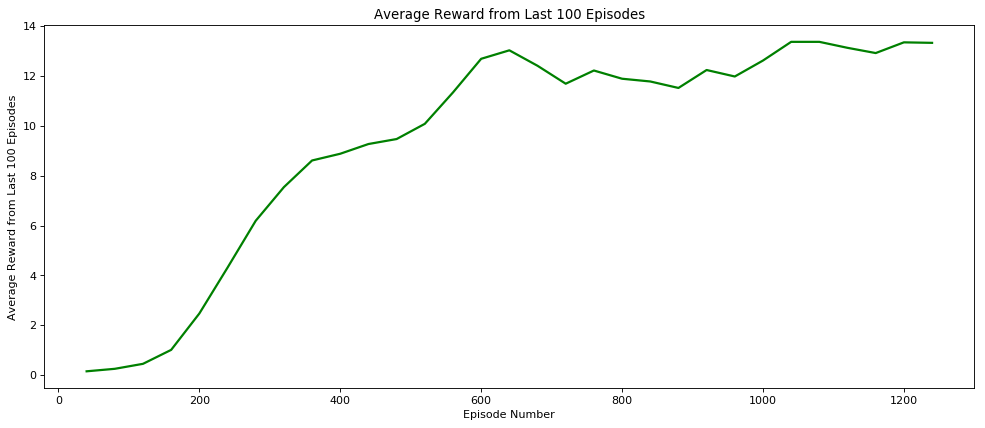

In [26]:
plot_title = "Average Reward from Last 100 Episodes"
y_label = "Average Reward from Last 100 Episodes"
plot(episodes_indices, avg_scores, plot_title, y_label)

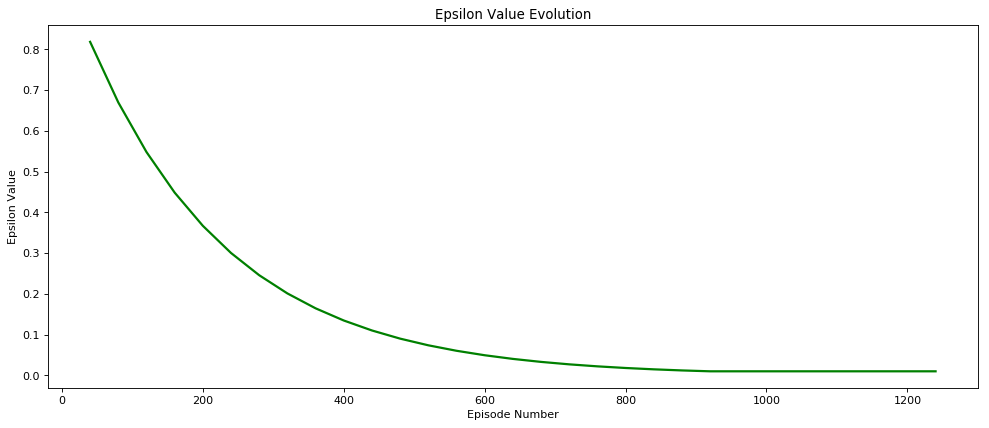

In [27]:
plot_title = "Epsilon Value Evolution"
y_label = "Epsilon Value"
plot(episodes_indices, epss, plot_title, y_label)

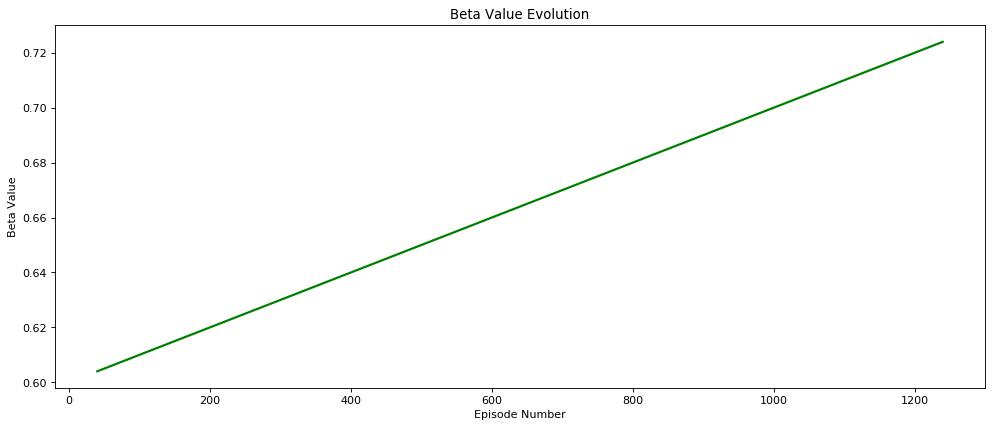

In [28]:
plot_title = "Beta Value Evolution"
y_label = "Beta Value"
plot(episodes_indices, betas, plot_title, y_label)